<a href="https://colab.research.google.com/github/CHINMAYI-23/Almabetter-Projects/blob/main/Email_Campaign_Effectiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : Email Campaign Effectiveness Prediction

# Project Type : Classification

# Contribution : Individual

# Business Context

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

# Business Objective:
 The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

 # Github Link : https://github.com/CHINMAYI-23/Almabetter-Projects


In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the dataset
df=pd.read_csv('/content/data_email_campaign.csv')

In [ ]:
#Firstlook
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
#Last 5 Records
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
#Shape of the data
df.shape

(68353, 12)

# Insight:

--> This dataset conatins 68353 entries and 12 features

In [ ]:
#dataset info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


# Handling Null Values

In [ ]:
#Check for null values
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

## Using the isnull().sum() function we found that this dataset consists of null values in the columns such as Customer_Location, Total_Past_Communications, Total_Links, Total_Images



<Axes: ylabel='Density'>

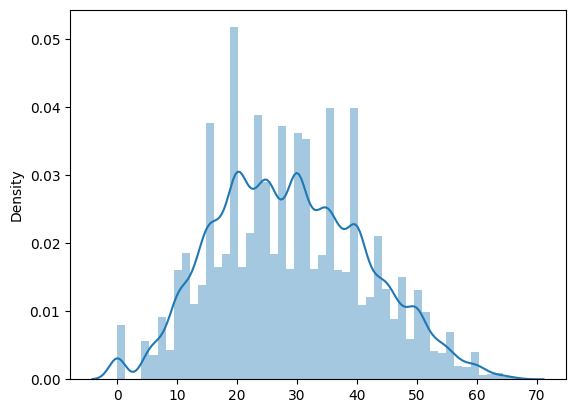

In [ ]:
#Plotting distribution w.r.t to Total_Past_Communications
sns.distplot(x=df['Total_Past_Communications'], hist=True)

In [ ]:
#Filling values using mean()
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace=True)

<Axes: ylabel='Density'>

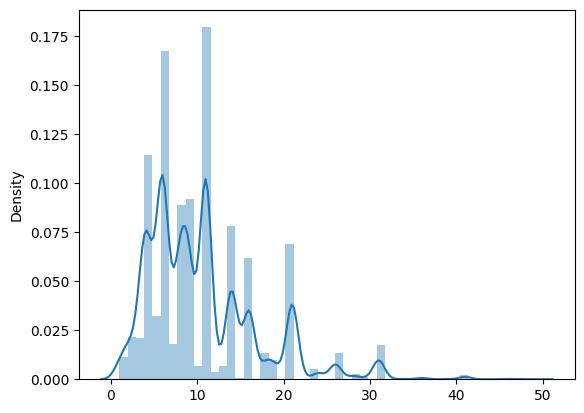

In [ ]:
#Plotting distribution w.r.t to Total_Links
sns.distplot(x=df['Total_Links'], hist=True)

In [ ]:
#Filling values using mean()
df['Total_Links'].fillna(df['Total_Links'].mode()[0], inplace=True)

<Axes: ylabel='Density'>

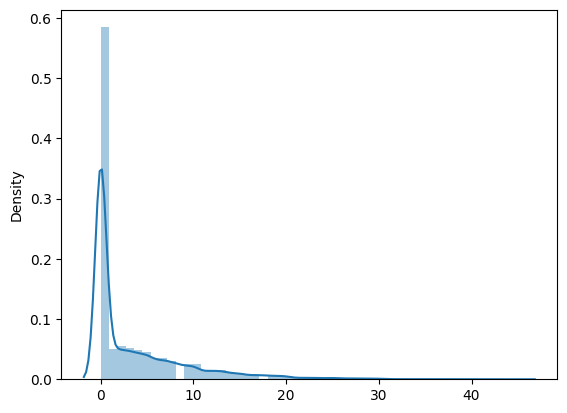

In [ ]:
#Plotting distribution w.r.t to Total_Images
sns.distplot(x=df['Total_Images'], hist=True)

In [ ]:
#Filling values using mean()
df['Total_Images'].fillna(df['Total_Images'].mode()[0], inplace=True)

In [ ]:
#Check for the duplicates
len(df[df.duplicated()])

0

# Insight:

--> There are no duplicates in the dataset

In [ ]:
#Check for unique values
df.nunique()

Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       65
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    45
Email_Status                     3
dtype: int64

In [ ]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

# Attribute information:

Email Id - It contains the email id's of the customers/individuals

Email Type - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

Subject Hotness Score - It is the email's subject's score on the basis of how good and effective the content is.

Email Source - It represents the source of the email like sales and marketing or important admin mails related to the product.

Email Campaign Type - The campaign type of the email.

Total Past Communications - This column contains the total previous mails from the same source, the number of communications had.

Customer Location - Contains demographical data of the customer, the location where the customer resides.

Time Email sent Category - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

Word Count - The number of words contained in the email.

Total links - Number of links in the email.

Total Images - Number of images in the email.

Email Status - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

In [ ]:
#Statistical description of data
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.447895,3.463564,0.230934
std,0.451462,0.997578,0.498109,0.468680,11.894171,0.631103,271.719440,6.280463,5.555121,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.933250,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,37.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


# Exploratory Data Analysis

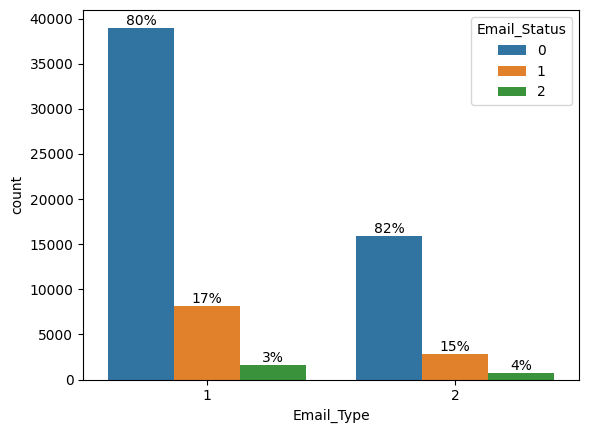

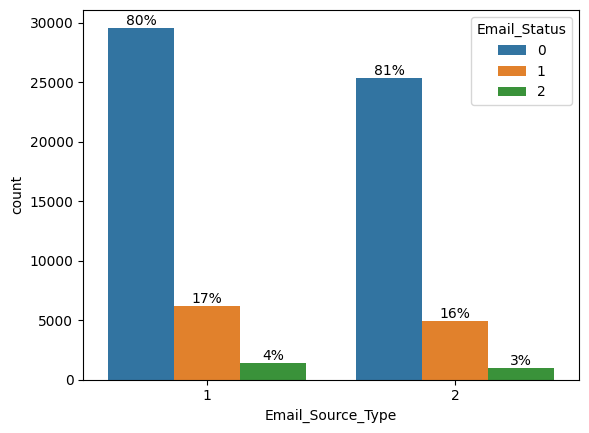

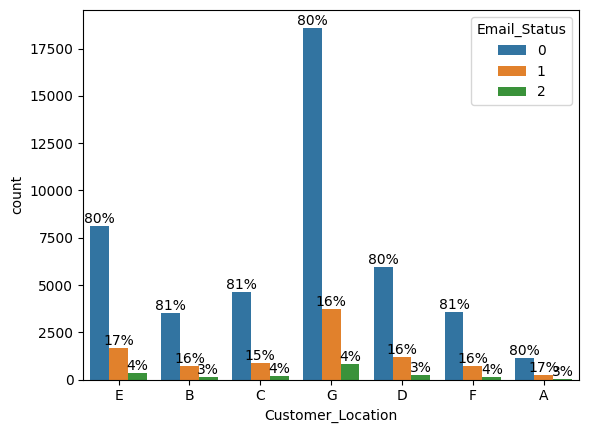

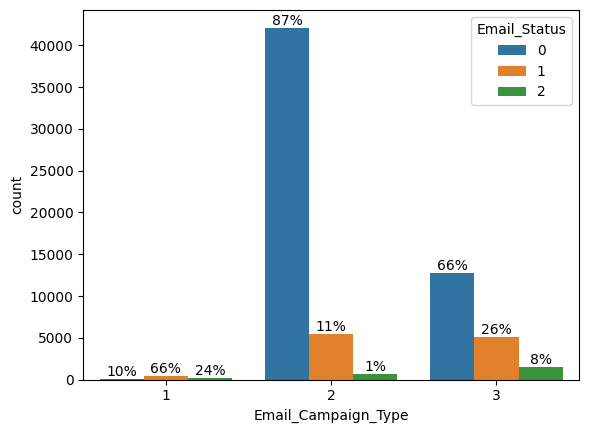

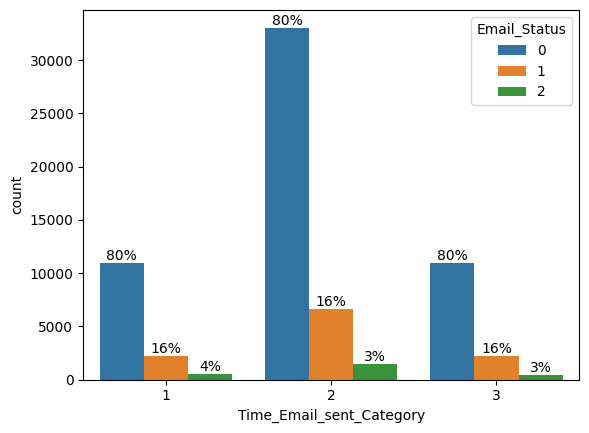

In [ ]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_var[0]])
  unique = len([x for x in df[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()

<Axes: ylabel='Density'>

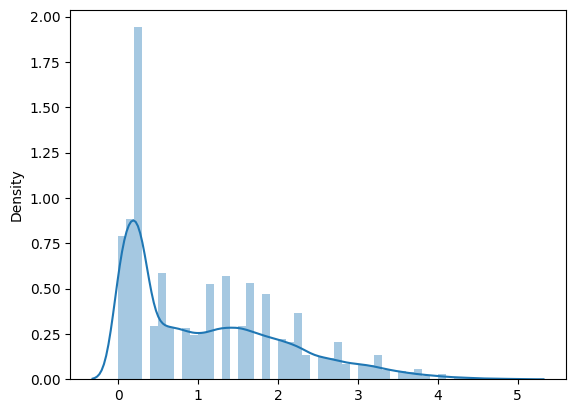

In [ ]:
#Distribution w.r.t subject_hotness_score
sns.distplot(x=df['Subject_Hotness_Score'], hist=True)

<Axes: ylabel='Density'>

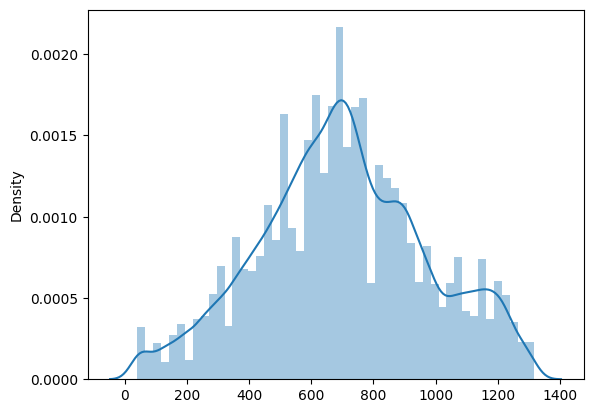

In [ ]:
#Distribution w.r.t Word_count
sns.distplot(x=df['Word_Count'], hist=True)

# Insight:

1. Word_Count and Total_Past_Communication are normally distributed.
2. Rest of the other columns are rightly skewed

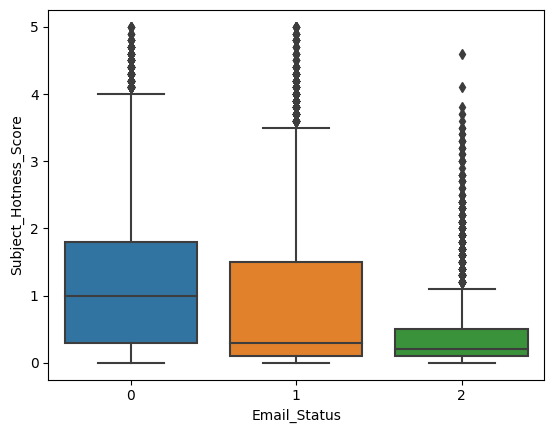

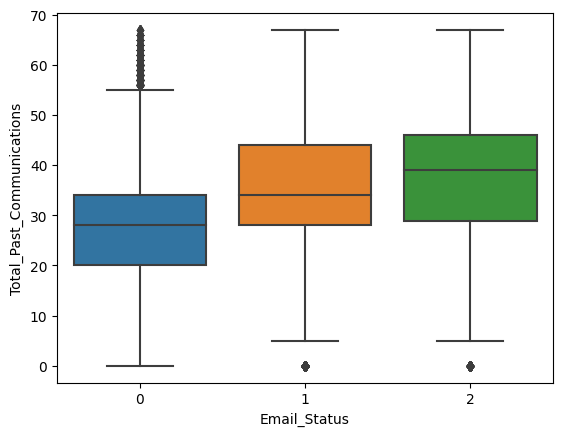

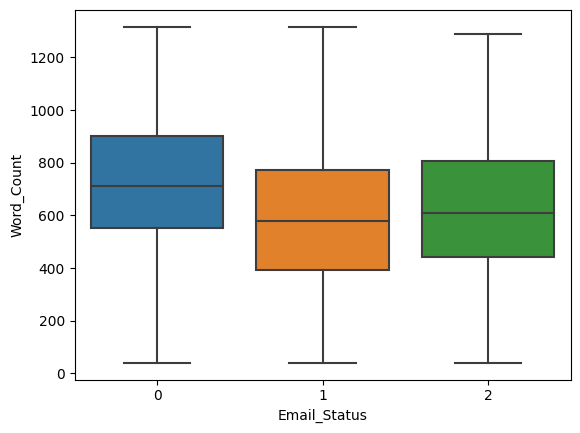

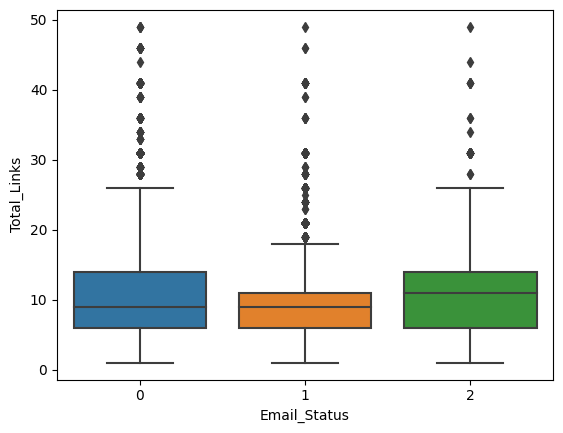

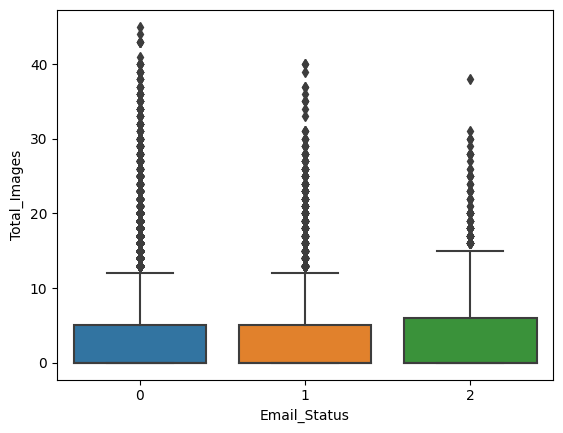

In [ ]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=df['Email_Status'], y= df[value])
 plt.show()

# Insight:

--> From the boxplots we can see that word_count has no outliers.

--> subject_hotness_score, total_images, total_links have considerable amount of outliers.

-->  More images were there in  ignored mails list


In [ ]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = df.drop(columns_to_drop,axis=1)

In [ ]:
#Correlation
df.corr()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_Type,1.000000,-0.235480,-0.275201,0.233565,-0.044495,-0.000581,0.077938,-0.159863,-0.106728,-0.015074
Subject_Hotness_Score,-0.235480,1.000000,0.006142,-0.550676,-0.419320,-0.003665,-0.237531,-0.027908,-0.019666,-0.146531
Email_Source_Type,-0.275201,0.006142,1.000000,0.035797,-0.066282,0.002137,0.048318,0.056755,0.038311,-0.024527
Email_Campaign_Type,0.233565,-0.550676,0.035797,1.000000,0.341066,0.001388,0.063540,0.004730,-0.008907,0.185510
Total_Past_Communications,-0.044495,-0.419320,-0.066282,0.341066,1.000000,-0.000790,-0.345251,0.106800,0.059849,0.233169
Time_Email_sent_Category,-0.000581,-0.003665,0.002137,0.001388,-0.000790,1.000000,-0.000508,-0.002002,0.000005,0.000051
Word_Count,0.077938,-0.237531,0.048318,0.063540,-0.345251,-0.000508,1.000000,0.072357,0.050802,-0.171116
Total_Links,-0.159863,-0.027908,0.056755,0.004730,0.106800,-0.002002,0.072357,1.000000,0.752937,-0.027849
Total_Images,-0.106728,-0.019666,0.038311,-0.008907,0.059849,0.000005,0.050802,0.752937,1.000000,-0.017392
Email_Status,-0.015074,-0.146531,-0.024527,0.185510,0.233169,0.000051,-0.171116,-0.027849,-0.017392,1.000000


<Axes: >

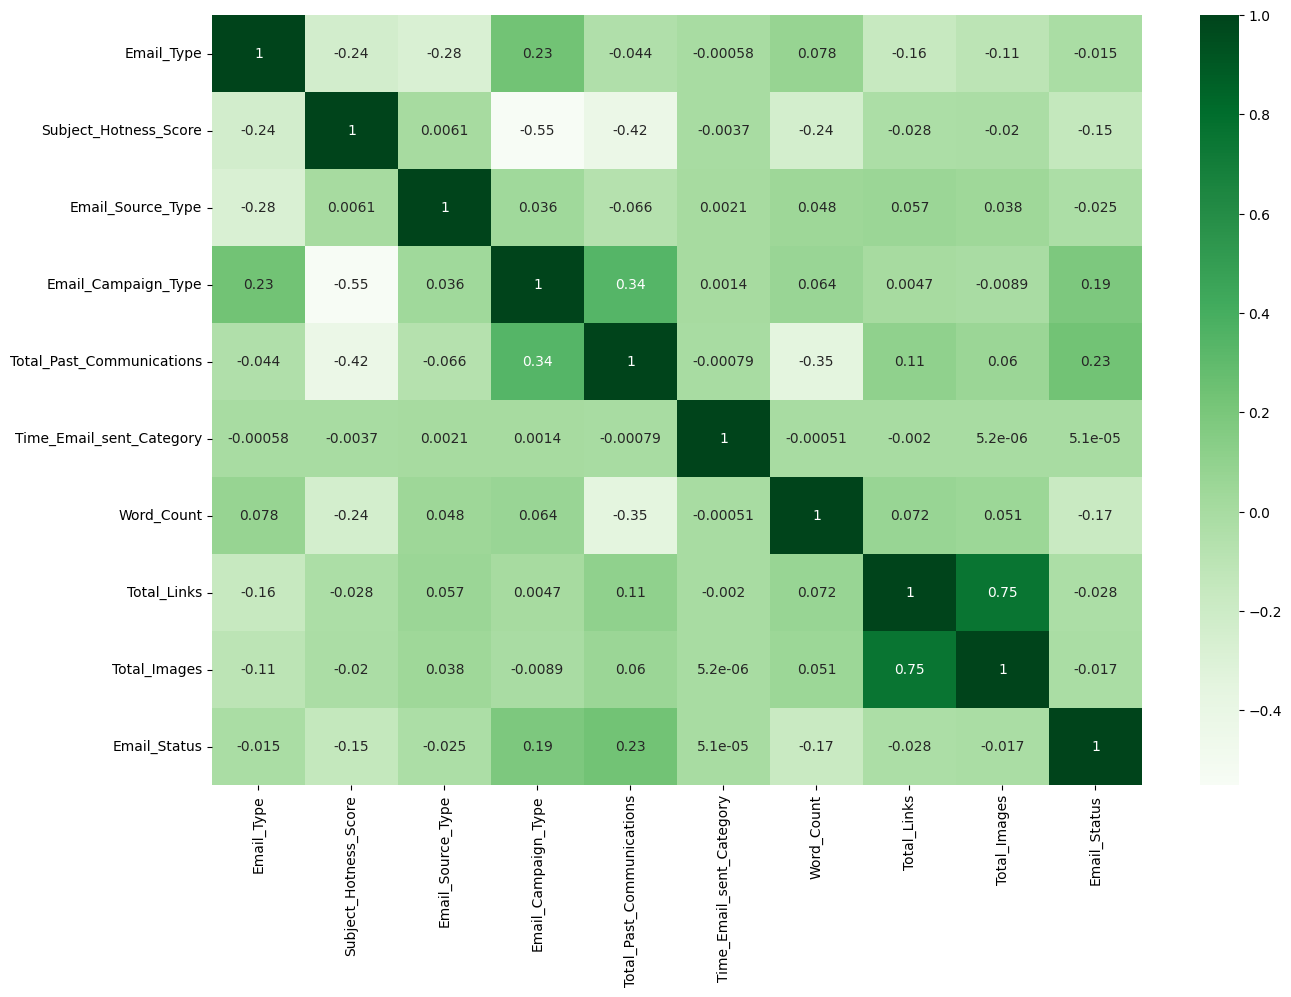

In [ ]:
#Plotting correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [ ]:
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


In [ ]:
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [ ]:
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Img_links,2.629047


In [ ]:
#Checking outliers in each category
cont_var.remove('Word_Count')
cont_var.remove('Total_Links')
cont_var.remove('Total_Images')
cont_var.append('Total_Img_links')

In [ ]:
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist())
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {0: 3061, 1: 437, 2: 122}}


In [ ]:
for elem in cont_var:
  q_low = df[elem].quantile(0.01)
  q_hi  = df[elem].quantile(0.99)
  df = df.drop(df[(df[elem] > q_hi) &  (df['Email_Status']==0)].index)
  df = df.drop(df[(df[elem] < q_low) & (df['Email_Status']==0)].index)

In [ ]:
df['Email_Status'].value_counts()

0    53502
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
df.shape

(66914, 9)

In [ ]:
#Feature Scaling
#One-hot encoding
categorical_variables.remove('Customer_Location')

In [ ]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_variables)
# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,2.2,33.0,440,0,8.0,1,0,0,1,0,1,0,0


In [ ]:
df.shape

(66914, 13)

In [ ]:
#Email_Status should be the last col
columns=list(df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df=df[columns]
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,2.2,33.0,440,8.0,1,0,0,1,0,1,0,0,0


In [ ]:
#Dependent&Independent features
X=df.drop('Email_Status', axis=1)
y=df['Email_Status']

In [ ]:
print(X.shape)
print(y.shape)

(66914, 12)
(66914,)


In [ ]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

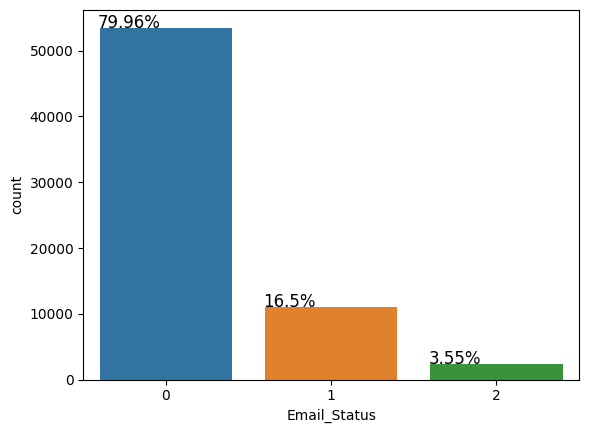

In [ ]:
#Handling Class Imbalance
#visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

In [ ]:
#importing random under sampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#resample
rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

#print shape
print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_train_rus))

Original dataset shape: 53531
Resampled dataset shape 5694


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 53531
Resampled dataset shape 128406


# Model Training

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#fitting Undersampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(x_train_rus, y_train_rus)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score, classification_report

In [ ]:
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [ ]:
#Function to evaluate the model

def model_evaluation(model_name_RUS,model_name_SMOTE,model_var_rus, model_var_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):

  #Making predictions random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Evaluation
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  print(classification_report(y_test,y_pred_rus_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print(classification_report(y_test,y_pred_smote_test))


  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_rus, final_dict_smote]
  return dict_list


----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------Test data ---------------

Confusion matrix 

[[6427 2106 2167]
 [ 560  578 1070]
 [  84   60  331]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72     10700
           1       0.21      0.26      0.23      2208
           2       0.09      0.70      0.16       475

    accuracy                           0.55     13383
   macro avg       0.40      0.52      0.37     13383
weighted avg       0.76      0.55      0.62     13383



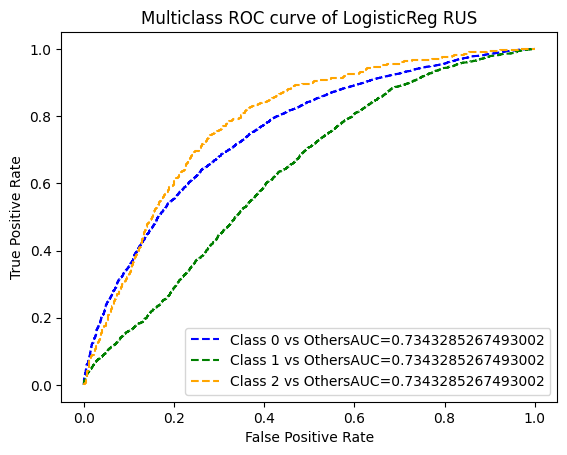

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7716  945 2039]
 [ 941  264 1003]
 [ 125   36  314]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79     10700
           1       0.21      0.12      0.15      2208
           2       0.09      0.66      0.16       475

    accuracy                           0.62     13383
   macro avg       0.39      0.50      0.37     13383
weighted avg       0.74      0.62      0.66     13383



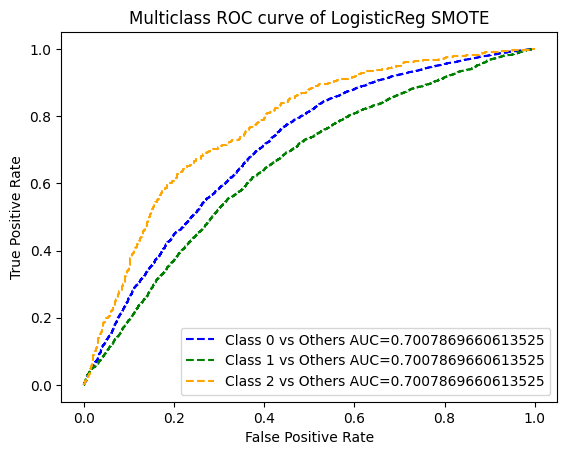

[{'Model_Name': 'LogisticReg RUS',
  'Train_Accuracy': 0.52019669827889,
  'Train_Recall': 0.52019669827889,
  'Train_Precision': 0.5122700130513607,
  'Train_F1score': 0.5052826885559811,
  'Train_AUC': 0.7010692489422804,
  'Test_Accuracy': 0.5481581110363895,
  'Test_Recall': 0.5481581110363895,
  'Test_Precision': 0.7647497485910029,
  'Test_F1score': 0.6226306599874135,
  'Test_AUC': 0.7343285267493002},
 {'Model_Name': 'LogisticReg SMOTE',
  'Train_Accuracy': 0.5176938772331511,
  'Train_Recall': 0.5176938772331511,
  'Train_Precision': 0.49483648290596405,
  'Train_F1score': 0.48556665325157594,
  'Train_AUC': 0.7096239424345063,
  'Test_Accuracy': 0.6197414630501382,
  'Test_Recall': 0.6197414630501382,
  'Test_Precision': 0.7407778105929189,
  'Test_F1score': 0.6643600276851015,
  'Test_AUC': 0.7007869660613525}]

In [ ]:
logistic_reg_list = model_evaluation('LogisticReg RUS','LogisticReg SMOTE',logistic_rus, logistic_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
logistic_reg_list

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier


#Classifier RUS
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)

#Classifier SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------Test data ---------------

Confusion matrix 

[[5545 2937 2218]
 [ 603  798  807]
 [  98  162  215]]
              precision    recall  f1-score   support

           0       0.89      0.52      0.65     10700
           1       0.20      0.36      0.26      2208
           2       0.07      0.45      0.12       475

    accuracy                           0.49     13383
   macro avg       0.39      0.44      0.34     13383
weighted avg       0.75      0.49      0.57     13383



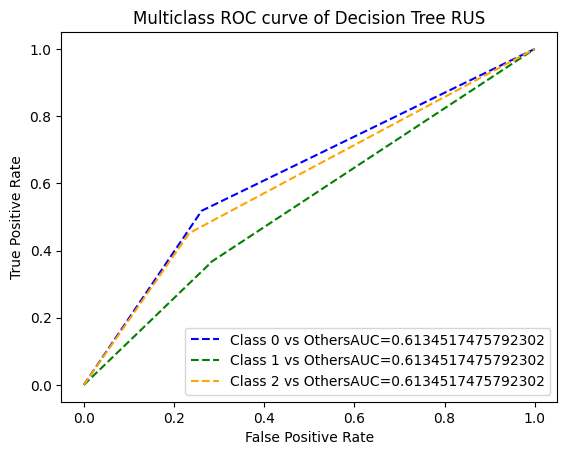

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8668 1644  388]
 [1311  679  218]
 [ 263  160   52]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     10700
           1       0.27      0.31      0.29      2208
           2       0.08      0.11      0.09       475

    accuracy                           0.70     13383
   macro avg       0.40      0.41      0.40     13383
weighted avg       0.72      0.70      0.71     13383



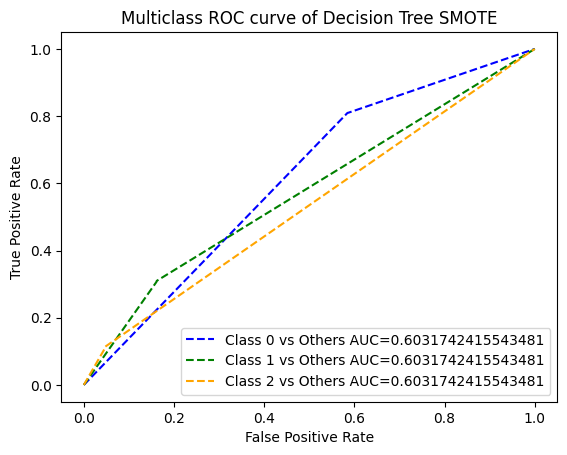

[{'Model_Name': 'Decision Tree RUS',
  'Train_Accuracy': 0.9992975061468212,
  'Train_Recall': 0.9992975061468212,
  'Train_Precision': 0.9992989835261129,
  'Train_F1score': 0.9992975053667925,
  'Train_AUC': 0.9999992597535794,
  'Test_Accuracy': 0.49002465814839724,
  'Test_Recall': 0.49002465814839724,
  'Test_Precision': 0.7459297665917244,
  'Test_F1score': 0.5704719268638524,
  'Test_AUC': 0.6134517475792302},
 {'Model_Name': 'Decision Tree SMOTE',
  'Train_Accuracy': 0.9993614005576064,
  'Train_Recall': 0.9993614005576064,
  'Train_Precision': 0.9993619054140598,
  'Train_F1score': 0.9993614155910744,
  'Train_AUC': 0.9999995635033974,
  'Test_Accuracy': 0.7023088993499216,
  'Test_Recall': 0.7023088993499216,
  'Test_Precision': 0.7245722754594153,
  'Test_F1score': 0.7128718998789988,
  'Test_AUC': 0.6031742415543481}]

In [ ]:
dt_eval_list = model_evaluation('Decision Tree RUS', 'Decision Tree SMOTE', dt_rus, dt_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
dt_eval_list

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#RUS
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_rus.fit(x_train_rus,y_train_rus)


#SMOTE
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------Test data ---------------

Confusion matrix 

[[7966 1060 1674]
 [ 728  441 1039]
 [  88   49  338]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     10700
           1       0.28      0.20      0.23      2208
           2       0.11      0.71      0.19       475

    accuracy                           0.65     13383
   macro avg       0.43      0.55      0.41     13383
weighted avg       0.78      0.65      0.70     13383



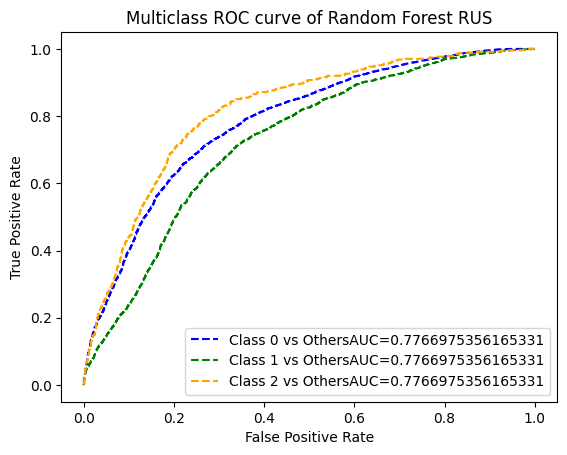

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9150  368 1182]
 [1113  243  852]
 [ 151   36  288]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10700
           1       0.38      0.11      0.17      2208
           2       0.12      0.61      0.21       475

    accuracy                           0.72     13383
   macro avg       0.46      0.52      0.41     13383
weighted avg       0.77      0.72      0.73     13383



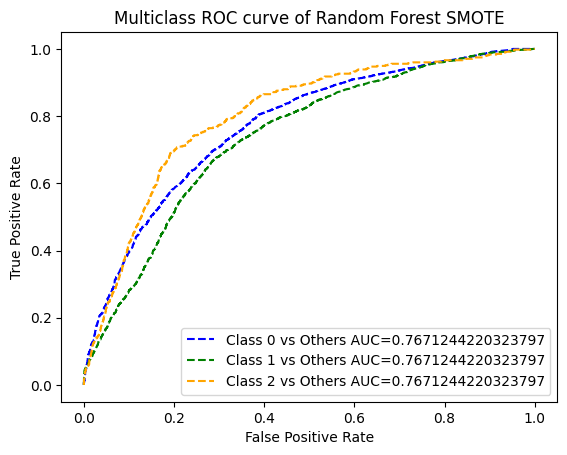

[{'Model_Name': 'Random Forest RUS',
  'Train_Accuracy': 0.5560238847910081,
  'Train_Recall': 0.5560238847910081,
  'Train_Precision': 0.5469155021839089,
  'Train_F1score': 0.5288122029258864,
  'Train_AUC': 0.7546898543306081,
  'Test_Accuracy': 0.6534409325263394,
  'Test_Recall': 0.6534409325263394,
  'Test_Precision': 0.7761053772208611,
  'Test_F1score': 0.6993599305648354,
  'Test_AUC': 0.7766975356165331},
 {'Model_Name': 'Random Forest SMOTE',
  'Train_Accuracy': 0.6188573742660001,
  'Train_Recall': 0.6188573742660001,
  'Train_Precision': 0.6167975314703633,
  'Train_F1score': 0.5707438823799148,
  'Train_AUC': 0.8076046707226725,
  'Test_Accuracy': 0.7233804079802735,
  'Test_Recall': 0.7233804079802735,
  'Test_Precision': 0.7688471352304931,
  'Test_F1score': 0.7283586079017528,
  'Test_AUC': 0.7671244220323797}]

In [ ]:
rf_eval_list = model_evaluation('Random Forest RUS', 'Random Forest SMOTE', rf_rus, rf_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_eval_list

In [ ]:
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

In [ ]:
add_list_to_final_df(logistic_reg_list)
add_list_to_final_df(rf_eval_list)
add_list_to_final_df(dt_eval_list)

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.520197,0.520197,0.512270,0.505283,0.701069,0.548158,0.548158,0.764750,0.622631,0.734329
1,LogisticReg SMOTE,0.517694,0.517694,0.494836,0.485567,0.709624,0.619741,0.619741,0.740778,0.664360,0.700787
2,Random Forest RUS,0.556024,0.556024,0.546916,0.528812,0.754690,0.653441,0.653441,0.776105,0.699360,0.776698
3,Random Forest SMOTE,0.618857,0.618857,0.616798,0.570744,0.807605,0.723380,0.723380,0.768847,0.728359,0.767124
4,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.490025,0.490025,0.745930,0.570472,0.613452
5,Decision Tree SMOTE,0.999361,0.999361,0.999362,0.999361,1.000000,0.702309,0.702309,0.724572,0.712872,0.603174


# Conclusion:

Out of all the ML models Random Forest Algorithm is giving good score of 72.83% with respect to test_f1score which is followed by decision tree algorithm which is giving f1score of around 71.28%